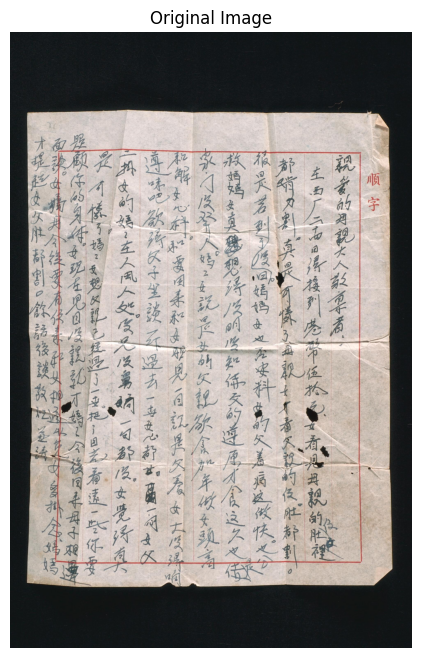

Starting preprocessing
Step 1: Resizing image
Step 2: Determining correct orientation
Best orientation: 0 degrees
Step 3: Removing red channel
Step 4: Enhanced Binarization
Step 5: Fine-tuning skew
Step 6: Improved line removal
Step 7: Removing edge content and finding content area
Step 8: Removing isolated noise
Preprocessing complete


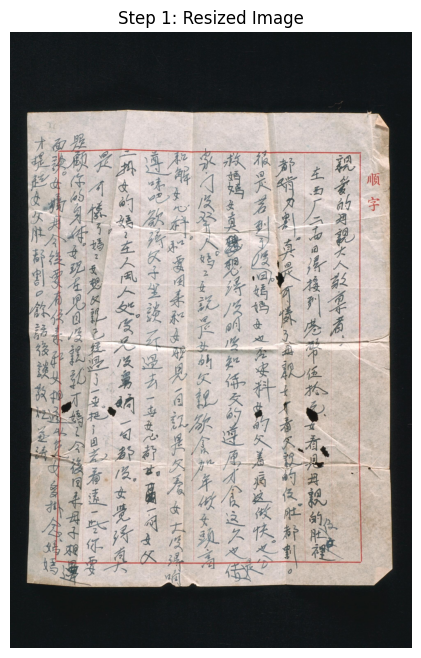

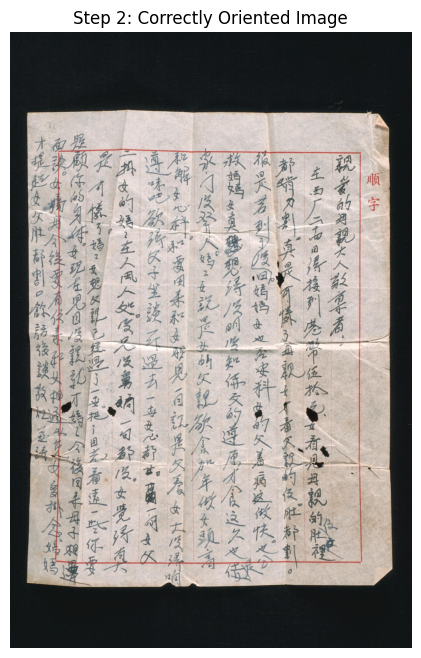

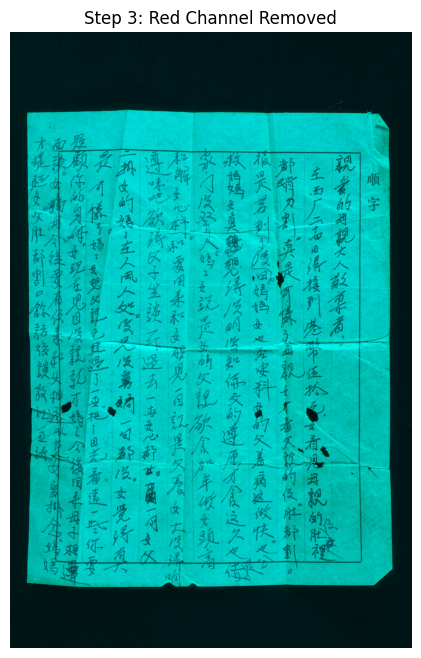

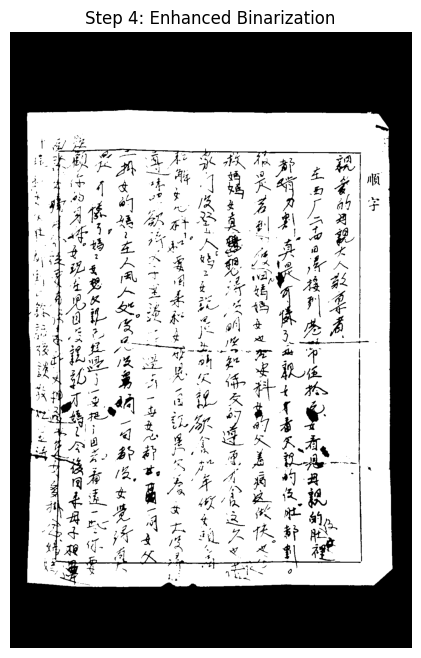

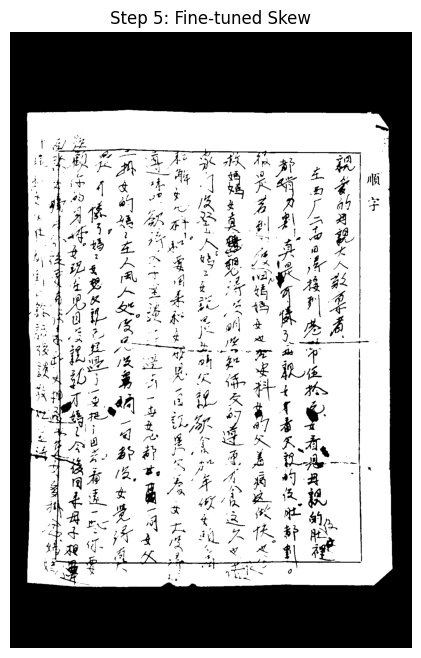

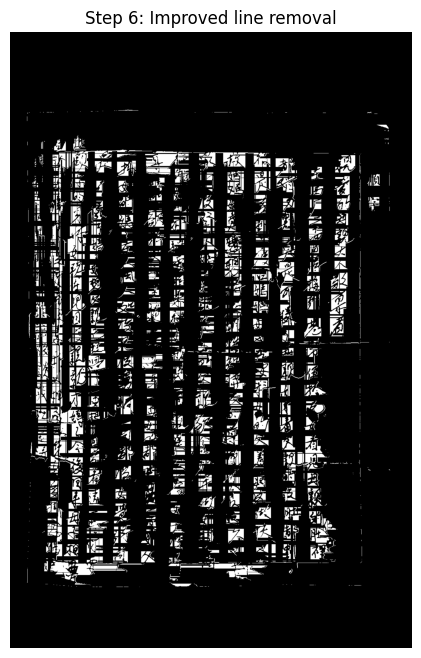

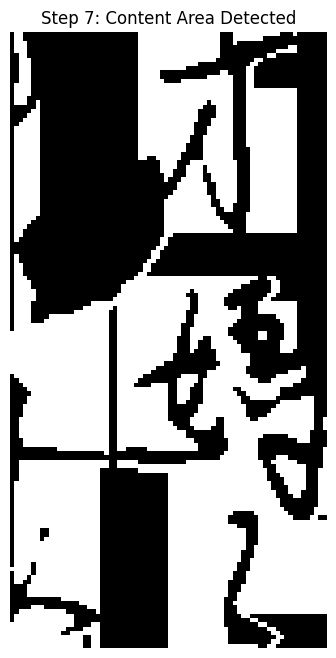

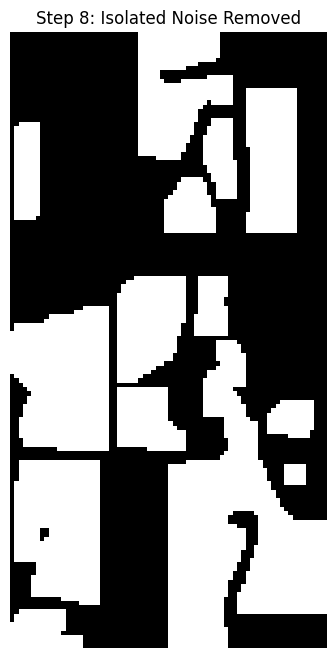

Starting character segmentation
Estimating segmentation parameters...
Estimated parameters: {'min_column_width': 20, 'min_char_width': 10, 'min_char_height': 10}
Identified 3 columns
Identified 3 characters in column 1
Identified 5 characters in column 2
Identified 2 characters in column 3


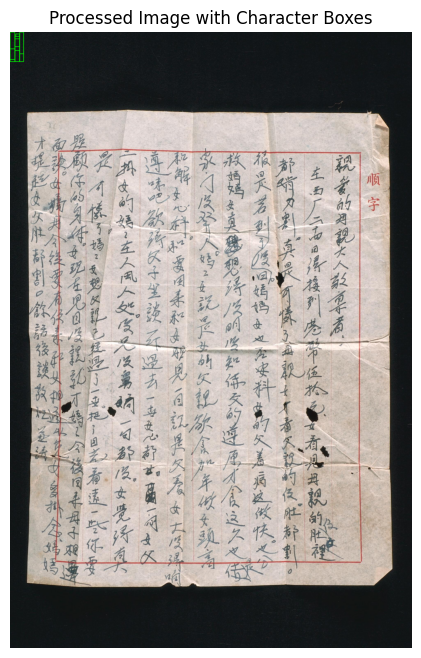

Column 1 characters:
  Character 1: (0, 0, 23, 82)
  Character 2: (0, 82, 23, 134)
  Character 3: (0, 134, 23, 144)
Column 2 characters:
  Character 1: (28, 9, 46, 21)
  Character 2: (24, 21, 46, 33)
  Character 3: (24, 33, 46, 71)
  Character 4: (24, 71, 46, 90)
  Character 5: (24, 90, 46, 144)
Column 3 characters:
  Character 1: (47, 0, 66, 106)
  Character 2: (47, 106, 66, 144)


In [2]:
import cv2
import matplotlib.pyplot as plt
from preproc_utils import preprocess_ancient_chinese_text, segment_characters

# Load an image
image_path = "data/letters/2000-06963-002.jpg"
image = cv2.imread(image_path)

if image is None:
    raise ValueError(f"Unable to read image at {image_path}")

# Display the original image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# Preprocess the image
preprocessed, steps = preprocess_ancient_chinese_text(image)

# Display all preprocessing steps
for step_name, step_image in steps:
    plt.figure(figsize=(12, 8))
    if len(step_image.shape) == 3:
        plt.imshow(cv2.cvtColor(step_image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(step_image, cmap='gray')
    plt.title(step_name)
    plt.axis('off')
    plt.show()

# Perform character segmentation
params = None  # You can set custom params here if needed
character_boxes = segment_characters(preprocessed, params)

# Display the results
result_image = image.copy()
for column_chars in character_boxes:
    for (x1, y1, x2, y2) in column_chars:
        cv2.rectangle(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image with Character Boxes")
plt.axis('off')
plt.show()

# Print character box information
for i, column_chars in enumerate(character_boxes):
    print(f"Column {i+1} characters:")
    for j, (x1, y1, x2, y2) in enumerate(column_chars):
        print(f"  Character {j+1}: ({x1}, {y1}, {x2}, {y2})")

In [1]:
import json
from collections import defaultdict

def find_duplicates(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    id_to_char = defaultdict(list)
    char_to_id = defaultdict(list)
    
    for char, id in data.items():
        id_to_char[id].append(char)
        char_to_id[char].append(id)
    
    duplicate_ids = {id: chars for id, chars in id_to_char.items() if len(chars) > 1}
    duplicate_chars = {char: ids for char, ids in char_to_id.items() if len(ids) > 1}
    
    return duplicate_ids, duplicate_chars

file_path = 'data/combined/combined_char_set.json'
duplicate_ids, duplicate_chars = find_duplicates(file_path)

print("Duplicate IDs:")
for id, chars in duplicate_ids.items():
    print(f"ID {id}: {', '.join(chars)}")

print("\nDuplicate Characters:")
for char, ids in duplicate_chars.items():
    print(f"Character '{char}': {', '.join(ids)}")

Duplicate IDs:
ID 88901: #, ○, 𱀠, 𰢽, ●, 𰚾, □, 𰝈, 𰂬, 𰚆, ☉, ⾓, ※, 𰥍, 〇, 𰿻, 𱅩, 𱉝, 𰩑, 𰣃, |, ｜, 𰃺, ⿔, 𰛓, 𰥱, 々, 𰥎, 𰍪, 𱇨, 𰊧, 𰙔, 𰀄, 𰝩, 𰊤, 𰴔, 𰃝, 𰑊, 𰡡, 𱄥, 𰶱, 𰁕, 𰆸, 𰯲, ‧, 𰱋, 𰂸, 𰬈, 𰝞, ■, 𰨅, 𰦝, ：, 𰶲, 𰘂, 𰩋, 𰵕, 𰨟, 𰬦, 𰲅, 𰳰, 𰢼, ⾝, 𰩶, 𰜮, 𰿾, 𰑯, 𰳈, 𰠛, 𰣷, 𰁓, 𰣸, 𰛷, 𰤼, 𰨬, 𰳧, 𰜟, 𰽛, 𰋙, 𱋿, 𱇔, 𱌇, 𰣴, 𰶖, ⼥, 𱂶, 𰦷, 𰀈, 𰧫, 𱇶, 𰙉, 𰭵, 𱇽, 𱋫, 」, 、, 𰅄, 𰔤, 𰖆, 𰀁, （, ）, 𰔂, 𰉮, 𰁧, 𰸒, 𰟉, 𰆥, 𰥐, 𰥀, 𰹝, 𰵲, 𰕣, 𰩬, 𰒑, 𰪱, 𰷄, 𰺰, 𰨗, ⺽, 𰪀, 𰷾, 𰵞, 𰅷, 𰙜, 𱈂, 𰨔, 𰱿, 𱆮, 𰨛, 𰟯, 𰚨, 𰞝, 𰡛, 𰩝, 𰏙, 𰁦, 𰐨, 𰖍, 𰏘, 𰨴, 𰃤, 𰶵, 𱇕, 𰴫, 𰂇, 𰍅, 𰚻, 𰊇, 𰽘, 𰋶

Duplicate Characters:


In [3]:
import os
from PIL import Image
import math

def create_sprite_sheet(folder_path, output_path):
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    images = [Image.open(os.path.join(folder_path, f)) for f in image_files]

    total_images = len(images)
    print(f"Processing {total_images} images")

    # Find smallest and largest images
    sizes = [img.size for img in images]
    min_size = min(sizes, key=lambda x: x[0] * x[1])
    max_size = max(sizes, key=lambda x: x[0] * x[1])
    print(f"Smallest image size: {min_size}")
    print(f"Largest image size: {max_size}")

    # Calculate the size of the square sprite sheet
    sheet_size = math.ceil(math.sqrt(total_images))
    max_dimension = max(max(img.size) for img in images)
    print(f"Using max dimension of {max_dimension} for each cell")
    
    # Create a new square image
    sheet_dimensions = sheet_size * max_dimension
    print(f"Creating sprite sheet of size {sheet_dimensions}x{sheet_dimensions}")
    sprite_sheet = Image.new('RGBA', (sheet_dimensions, sheet_dimensions), (0, 0, 0, 0))

    # Place images on the sprite sheet
    for i, img in enumerate(images):
        x = (i % sheet_size) * max_dimension
        y = (i // sheet_size) * max_dimension
        
        # Resize and pad the image
        img_resized = Image.new('RGBA', (max_dimension, max_dimension), (0, 0, 0, 0))
        img_resized.paste(img, ((max_dimension - img.width) // 2, (max_dimension - img.height) // 2))
        
        sprite_sheet.paste(img_resized, (x, y))

    # Save the sprite sheet
    sprite_sheet.save(output_path)
    print(f"Sprite sheet saved to {output_path}")

# Usage
folder_path = '/Users/erniesg/code/erniesg/if_letters_home_could_sing/data/combined/characters/11305'
output_path = 'sprite_sheet.png'
create_sprite_sheet(folder_path, output_path)

Processing 228 images
Smallest image size: (15, 21)
Largest image size: (173, 179)
Using max dimension of 179 for each cell
Creating sprite sheet of size 2864x2864
Sprite sheet saved to sprite_sheet.png
